<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/pyplot.py'>

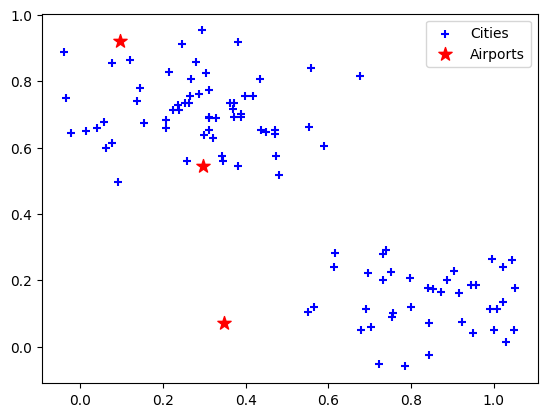

In [727]:
import random
import numpy as np
import matplotlib.pyplot as plt

#amount of cities
num_city = 100
#amount of airports
num_air = 3
#amount of city clusters
num_center = 5
#controls dispersion around city clusters(how close and how far)
sigma = 0.1
#removes duplicate cities, out of orders
cities = set()
airports = []

#5 centers
for i in range(num_center):
    #generate random x and y coords
    x = random.random()
    y = random.random()
    #create cluster coordinates around (x,y) called xc and yc, creates 20 clusters every time based on numCity and numCenter variable
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    #creates set of cities appending xc, yc representing a singular city
    #create 100 cities by the end(idk how)
    #creates coordinates using xc and yc, zip since xc and yc are lists
    cities = cities.union(zip(xc, yc))

#3 airports
for i in range(num_air):
    #generate random x and y coords
    x = random.random()
    y = random.random()
    #appends x,y coord/tuple to airport array
    airports.append((x,y)) 

#create two arrays of categorizes by x  or y (2,3), (3,4), (4,5) -> x: (2,3,4), y:(3,4,5) for zip
zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

In [728]:
#return a matrix so i can replace cities in my other code, 
def createCitySets(cities, x1, x2, x3, y1, y2, y3):
     #creates a list of cities
    cityList = list(cities)
    #citySet respective to airport1, 2, and 3
    citySet1 = []
    citySet2 = []
    citySet3 = []
    for i in range(len(cityList)):
        xc, yc = cityList[i]
        #updae the distance related to airport11, 2, and 2 based on city coord
        #gets the distances find the smallest between each airport
        distance1 = (x1 - xc) ** 2 + (y1 - yc) ** 2  
        distance2 = (x2 - xc) ** 2 + (y2 - yc) ** 2
        distance3 = (x3 - xc) ** 2 + (y3 - yc) ** 2

        #if gets the min distance and if it's the smallest, appened coord to respective citySet
        if distance1 <= distance2 and distance1 <= distance3:
            citySet1.append(cityList[i])
        elif distance2 <= distance1 and distance2 <= distance3:
            citySet2.append(cityList[i])
        else:
            citySet3.append(cityList[i])
    
    #make a total citySet respective to all the airports
    citySet = [citySet1, citySet2, citySet3]
    return citySet

In [729]:
#minimize distance between airport and city coordinates
#need all the airport coordinates to repass in the values later and update gradient properly
def objFunc(citySet, x1, x2, x3, y1, y2, y3):
    #intialize distance
    distance = 0
    for i in range(len(citySet[0])):
        #extract xy and xc from cityList since it is also an array of tuples
        xc, yc = citySet[0][i]
        #updates distance for every airport coordiante(x,y) - city1 cluster coordinate
        distance += (x1 - xc) ** 2 + (y1 - yc) ** 2
    for i in range(len(citySet[1])):
        #extract xy and xc from cityList since it is also an array of tuples
        xc, yc = citySet[1][i]
        #updates distance for every airport coordiante(x,y) - city2 cluster coordinate
        distance += (x2 - xc) ** 2 + (y2 - yc) ** 2
    for i in range(len(citySet[2])):
        #extract xy and xc from cityList since it is also an array of tuples
        xc, yc = citySet[2][i]
        #updates distance for every airport coordiante(x,y) - city3 cluster coordinate
        distance += (x3 - xc) ** 2 + (y3 - yc) ** 2
# return cities
    return distance

In [730]:
#gradient of objFunction
#need all the airport coordinates to repass in the values later and update gradient properly
def grad(citySet, x1, x2, x3, y1, y2, y3):
    #intialize the gradients for every coordinate 
    gradx1 = gradx2 = gradx3 = grady1 = grady2 = grady3 = 0
    gradList = []
    for i in range(len(citySet[0])):
        #extract xy and xc from citySet since it is also an array of tuples
        xc, yc = citySet[0][i]
        #updates gradient for every airport coordiante(x,y) - city cluster coordinate
        gradx1 += (x1 - xc) * 2
        grady1 += (y1 - yc) * 2
    for i in range(len(citySet[1])):
        #extract xy and xc from citySet since it is also an array of tuples
        xc, yc = citySet[1][i]
        #updates gradient for every airport coordiante(x,y) - city cluster coordinate
        gradx2 += (x2 - xc) * 2
        grady2 += (y2 - yc) * 2
    for i in range(len(citySet[2])):
        #extract xy and xc from citySet since it is also an array of tuples
        xc, yc = citySet[2][i]
        #updates gradient for every airport coordiante(x,y) - city cluster coordinate
        gradx3 += (x3 - xc) * 2
        grady3 += (y3 - yc) * 2
    #appened grad elements to array
    gradList.append(gradx1)
    gradList.append(gradx2)
    gradList.append(gradx3)
    gradList.append(grady1)
    gradList.append(grady2)
    gradList.append(grady3)
    return gradList



In [731]:
def gd(alpha, iterations, x1, x2, x3, y1, y2, y3):
    citySet = createCitySets(cities, x1, x2, x3, y1, y2, y3)
    #initialize arr's
    iterationArr = []
    objValArr = []
    for i in range(iterations):
        #collect every iteration for plotting
        iterationArr.append(i)
        objValue = objFunc(citySet, x1, x2, x3, y1, y2, y3)
        #oappen every distance value called on top 
        objValArr.append(objValue)    
        #call gradFunction
        gradList = grad(citySet, x1, x2, x3, y1, y2, y3)
        gradx1 = gradList[0]
        gradx2 = gradList[1]
        gradx3 = gradList[2]
        grady1 = gradList[3]
        grady2 = gradList[4]
        grady3 = gradList[5]
        #update every individual coordinate value by minimizing thru gradient
        x1 -= alpha * gradx1
        x2 -= alpha * gradx2
        x3 -= alpha * gradx3
        y1 -= alpha * grady1
        y2 -= alpha * grady2
        y3 -= alpha * grady3
    optCoords = [(x1, y1), (x2, y2), (x3, y3)]
    #plot iteration and weights of objValueArr through arrays
    plt.scatter(iterationArr, objValArr)
    plt.xlabel("Step")
    plt.ylabel('Objective Function Value f(x1, y1, x2, y2, x3, y3)')
    plt.title("Objective Function History")
    plt.show()
    return optCoords

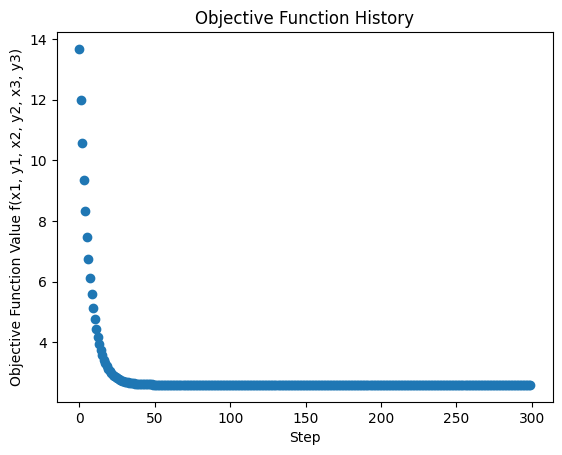

[(0.34279102005829515, 0.675819708219304), (0.840772547022009, 0.14085275983005907), (0.14571833349415525, 0.8002979371231592)]


In [732]:
#run gradient descent for 200 steps and learning rate of .0001
alpha = .001
steps = 300
#extract single element x and y from airports(an arr of tuples containing coords)
x1, y1 = airports[0]
x2, y2 = airports[1]
x3, y3 = airports[2]
optCoords = gd(alpha, steps, x1, x2, x3, y1, y2, y3)
print(optCoords)
#extract single element x and y from airports(an arr of tuples containing coords)
# x1, y1 = optCoords[0]
# x2, y2 = optCoords[1]
# x3, y3 = optCoords[3]
# plt.scatter([x1, x2, x3], [y1, y2, y3],marker='*', color='r', s=100, label='Airports')
# plt.legend()

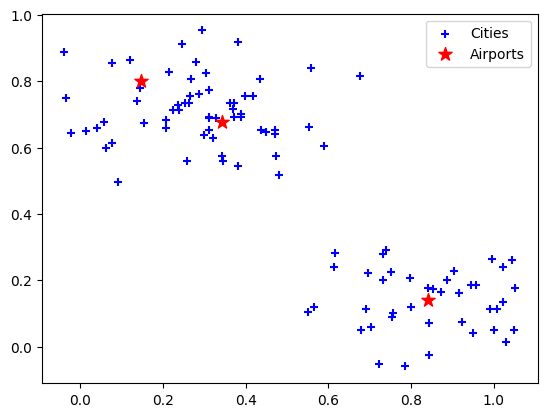

In [733]:
#extract single element x and y from airports(an arr of tuples containing coords)
x1, y1 = optCoords[0]
x2, y2 = optCoords[1]
x3, y3 = optCoords[2]
zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
plt.scatter([x1, x2, x3], [y1, y2, y3],marker='*', color='r', s=100, label='Airports')
plt.legend()
